# Growth modeling applied to several fruit species

Daniel Jacob (INRAE BFP 2022)

<br/>

**Frimouss project**: FRuit Integrative MOdelling for a Unified Selection System

  * **ANR Project ID**: [ANR-15-CE20-0009](http://www.agence-nationale-recherche.fr/Project-ANR-15-CE20-0009)

  * **Publication** : Léa Roch, Sylvain Prigent, Holger Klose, Coffi-Belmys Cakpo, Bertrand Beauvoit, et al.. Biomass composition explains fruit relative growth rate and discriminates climacteric from non-climacteric species. Journal of Experimental Botany, Oxford University Press (OUP), 2020, 71 (19), pp.5823-5836. [doi:10.1093/jxb/eraa302](https://academic.oup.com/jxb/article/71/19/5823/5864020)

**Frimouss dataset interfaced by ODAM**

  * All the data concerning each fruit species have been organized and managed in the same way using the ODAM approach and the associated tools.

  * ODAM Dataexplorer : https://pmb-bordeaux.fr/dataexplorer/?dc=Frimouss

  * ODAM online documentation: https://inrae.github.io/ODAM/


**Plant growth modelling**

Analysing and modelling plant growth is an important interdisciplinary field of plant science. The use of relative growth rates, involving the analysis of plant growth relative to plant size, has more or less independently emerged in different research groups and at different times and has provided powerful tools for assessing the growth performance and growth efficiency of plants and plant populations. See [Plant growth analysis](https://en.wikipedia.org/wiki/Plant_growth_analysis) in wikipedia.

To measure the bioproductivity of a plant, the component of immediate interest is the net primary production or total yield. The plant weight — usually the dry weight - is a needed measurements for growth analysis. First we have to model the plant growth. 


## Initialisation

* Import Functions
* Init ODAM object : retrieve the dataset collection

In [1]:
ROOTDIR <- "./"
source(paste0(ROOTDIR,"fitmodels.R"))
source(paste0(ROOTDIR,"odam.R"))
source(paste0(ROOTDIR,"growth.R"))

# FRIMOUSS dataset managed by ODAM
dh <- new('odamws', URLWS, 'Frimouss')
collection <- get_Collection()
collection[, c(2,3,5)]

,datasetID,label,description
,<chr>,<chr>,<chr>
1,FR17AP003,Apple,Malus domestica (3750)
2,FR17CL004,Clementine,Citrus clementina (85681)
3,FR17CC005,Cucumber,Cucumis sativus (3659)
4,FR17EP006,Eggplant,Solanum melongena (4111)
5,FR17KW007,Kiwi,Actinidia deliciosa (3627)
6,FR17GV001,Grapevine,Vitis vinifera (29760)
7,FR17PE008,Peach,Prunus persica (3760)
8,FR17PP009,Pepper,Capsicum (4071)
9,FR17SB002,Strawberry,Fragaria x ananassa (3747)


## Effective implementation of growth modeling


### Models

  * Two growth models were chosen to be compared. The first model is a simple sigmoid. The second model is a double sigmoid.

  * Models : Weight = f(time-dependent .i.e Day After Anthesis)
 

#### Model 1 - Single Sigmoidal Model

  *  $\Large W_{1}(\theta,t) = d + \frac{a}{1+e^{-b(t-c)}}$

#### Model 2 - Sum of two Sigmoidal Model

  *  $\Large W_{2}(\theta,t) = d + \frac{a}{1+e^{-b(t-c)}} + \frac{f}{1+e^{-g(t-h)}}$

<br/>

Optimization of growth model parameters are based on a [Levenberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm).

<br/>

**NLS problems with the Levenberg-Marquardt algorithm**

  * The purpose nlsLM is to minimize the sum square of the vector returned by the function fn, by a modification of the Levenberg-Marquardt algorithm
  * https://www.rdocumentation.org/packages/minpack.lm/versions/1.2-1/topics/nlsLM


<br/>

### Normalized data

The optimization can be done without or with constraints, i.e. with limits (lower and upper parameter bounds) imposed on the parameters. 
Because the growth data are previously normalized (the time between 0 and 1 and the intensities between 0 and 1) we can choose identical bounds (therefore also normalized) for all the fruit species, especially the upper value(s) of the slope (i.e. parameter _b_ in model 1, parameters _b_ and _g_ in model 2) called _Vmax_.  This bound  can be fixed by the user. 

Note that the _d_ parameter is equal to zero for all normalized model (and thus not being to be optimized) thus decreasing the number of parameters to be optimized.

### Parameters :

   * **_setName_** & **_Yname_** : set respectively the subset of data and the variable to be modelled. See for instance [metadata](https://pmb-bordeaux.fr/getdata/query/FR17AP003/metadata/?format=xml) corresponding to the _'FR17AP003'_ dataset (Apple) managed by ODAM.
   * **_datasetID_** : a number corresponding to a species (see collection: 1 for apple, 2 for clementine, ...)
   * **_VmaxSet_** : a set of _Vmax_ values (boundary of the slope) generating as many optimized models as there are values. A _Vmax_ equal to zero corresponds to no bounds on the slope.
   * **fneg** : a boolean indicating if the second sigmoid can have a negative sign (f parameter) i.e. when there is shrivelling of the fruit at the end of growth


In [2]:
# Sample subset name
setName <- c('fruits')

# Modelization of the fruit fresh weigth
Yname <- 'Weight'

dataSets <- collection$datasetID[c(1:9)]
dataNames <- collection$label[c(1:9)]

# Choose species (see collection above)
datasetID <- 2

cat(collection$label[datasetID],"\n")

# Compute for each vmax (0 means no bounds)
VmaxSet <- c(0,15,25,50)

# Allow the second sigmoid to have a negative sign (f parameter) 
# when there is shrivelling of the fruit at the end of growth.
fneg <- TRUE

# Display infos based on normalized values
normalized <- TRUE

# Select the final solution either as the best fit (BF) or as the most probable fit (MPF)
criterion <- "BF"

set.seed(1674)
system.time({
    m <- compute_growth(dataSets[datasetID], setName, Yname, VmaxSet, noptim=400, 
                       normalized=normalized, fneg=fneg, criterion=criterion)
})

Clementine 
FR17CL004  Getting ...  OK

--------------------------------
Model 1:
FR17CL004  Fitting ... ( 1 ) R2 = 0.9851162  OK
FR17CL004  -  Single Sigmoid 
         a          b        c       d
1 80.98447 0.05808204 150.3365 0.13475

--------------------------------
Model 2:
FR17CL004 - Vmax = 0 - Fitting ... ( 2 ) R2 = 0.9996093  OK
FR17CL004  -  Sum of two Sigmoid 
          a           b        c       d        f          g        h
1 -90.10635 -0.04963285 157.3821 0.13475 91.36902 -0.4215304 256.2251

FR17CL004 - Vmax = 15 - Fitting ... ( 2 ) R2 = 0.9992597  OK
FR17CL004  -  Sum of two Sigmoid 
         a          b        c       d         f          g   h
1 100.9997 0.04348244 161.6428 0.13475 -54.35437 0.05928854 253

FR17CL004 - Vmax = 25 - Fitting ... ( 2 ) R2 = 0.9992729  OK
FR17CL004  -  Sum of two Sigmoid 
        a          b        c       d         f          g   h
1 97.6562 0.04439905 160.1103 0.13475 -48.34835 0.07187559 253

FR17CL004 - Vmax = 50 - Fitting ... ( 

   user  system elapsed 
 13.294   0.016  16.041 

### Plot the different growth curves 
* corresponding to the different values of Vmax (boundary of the slope)

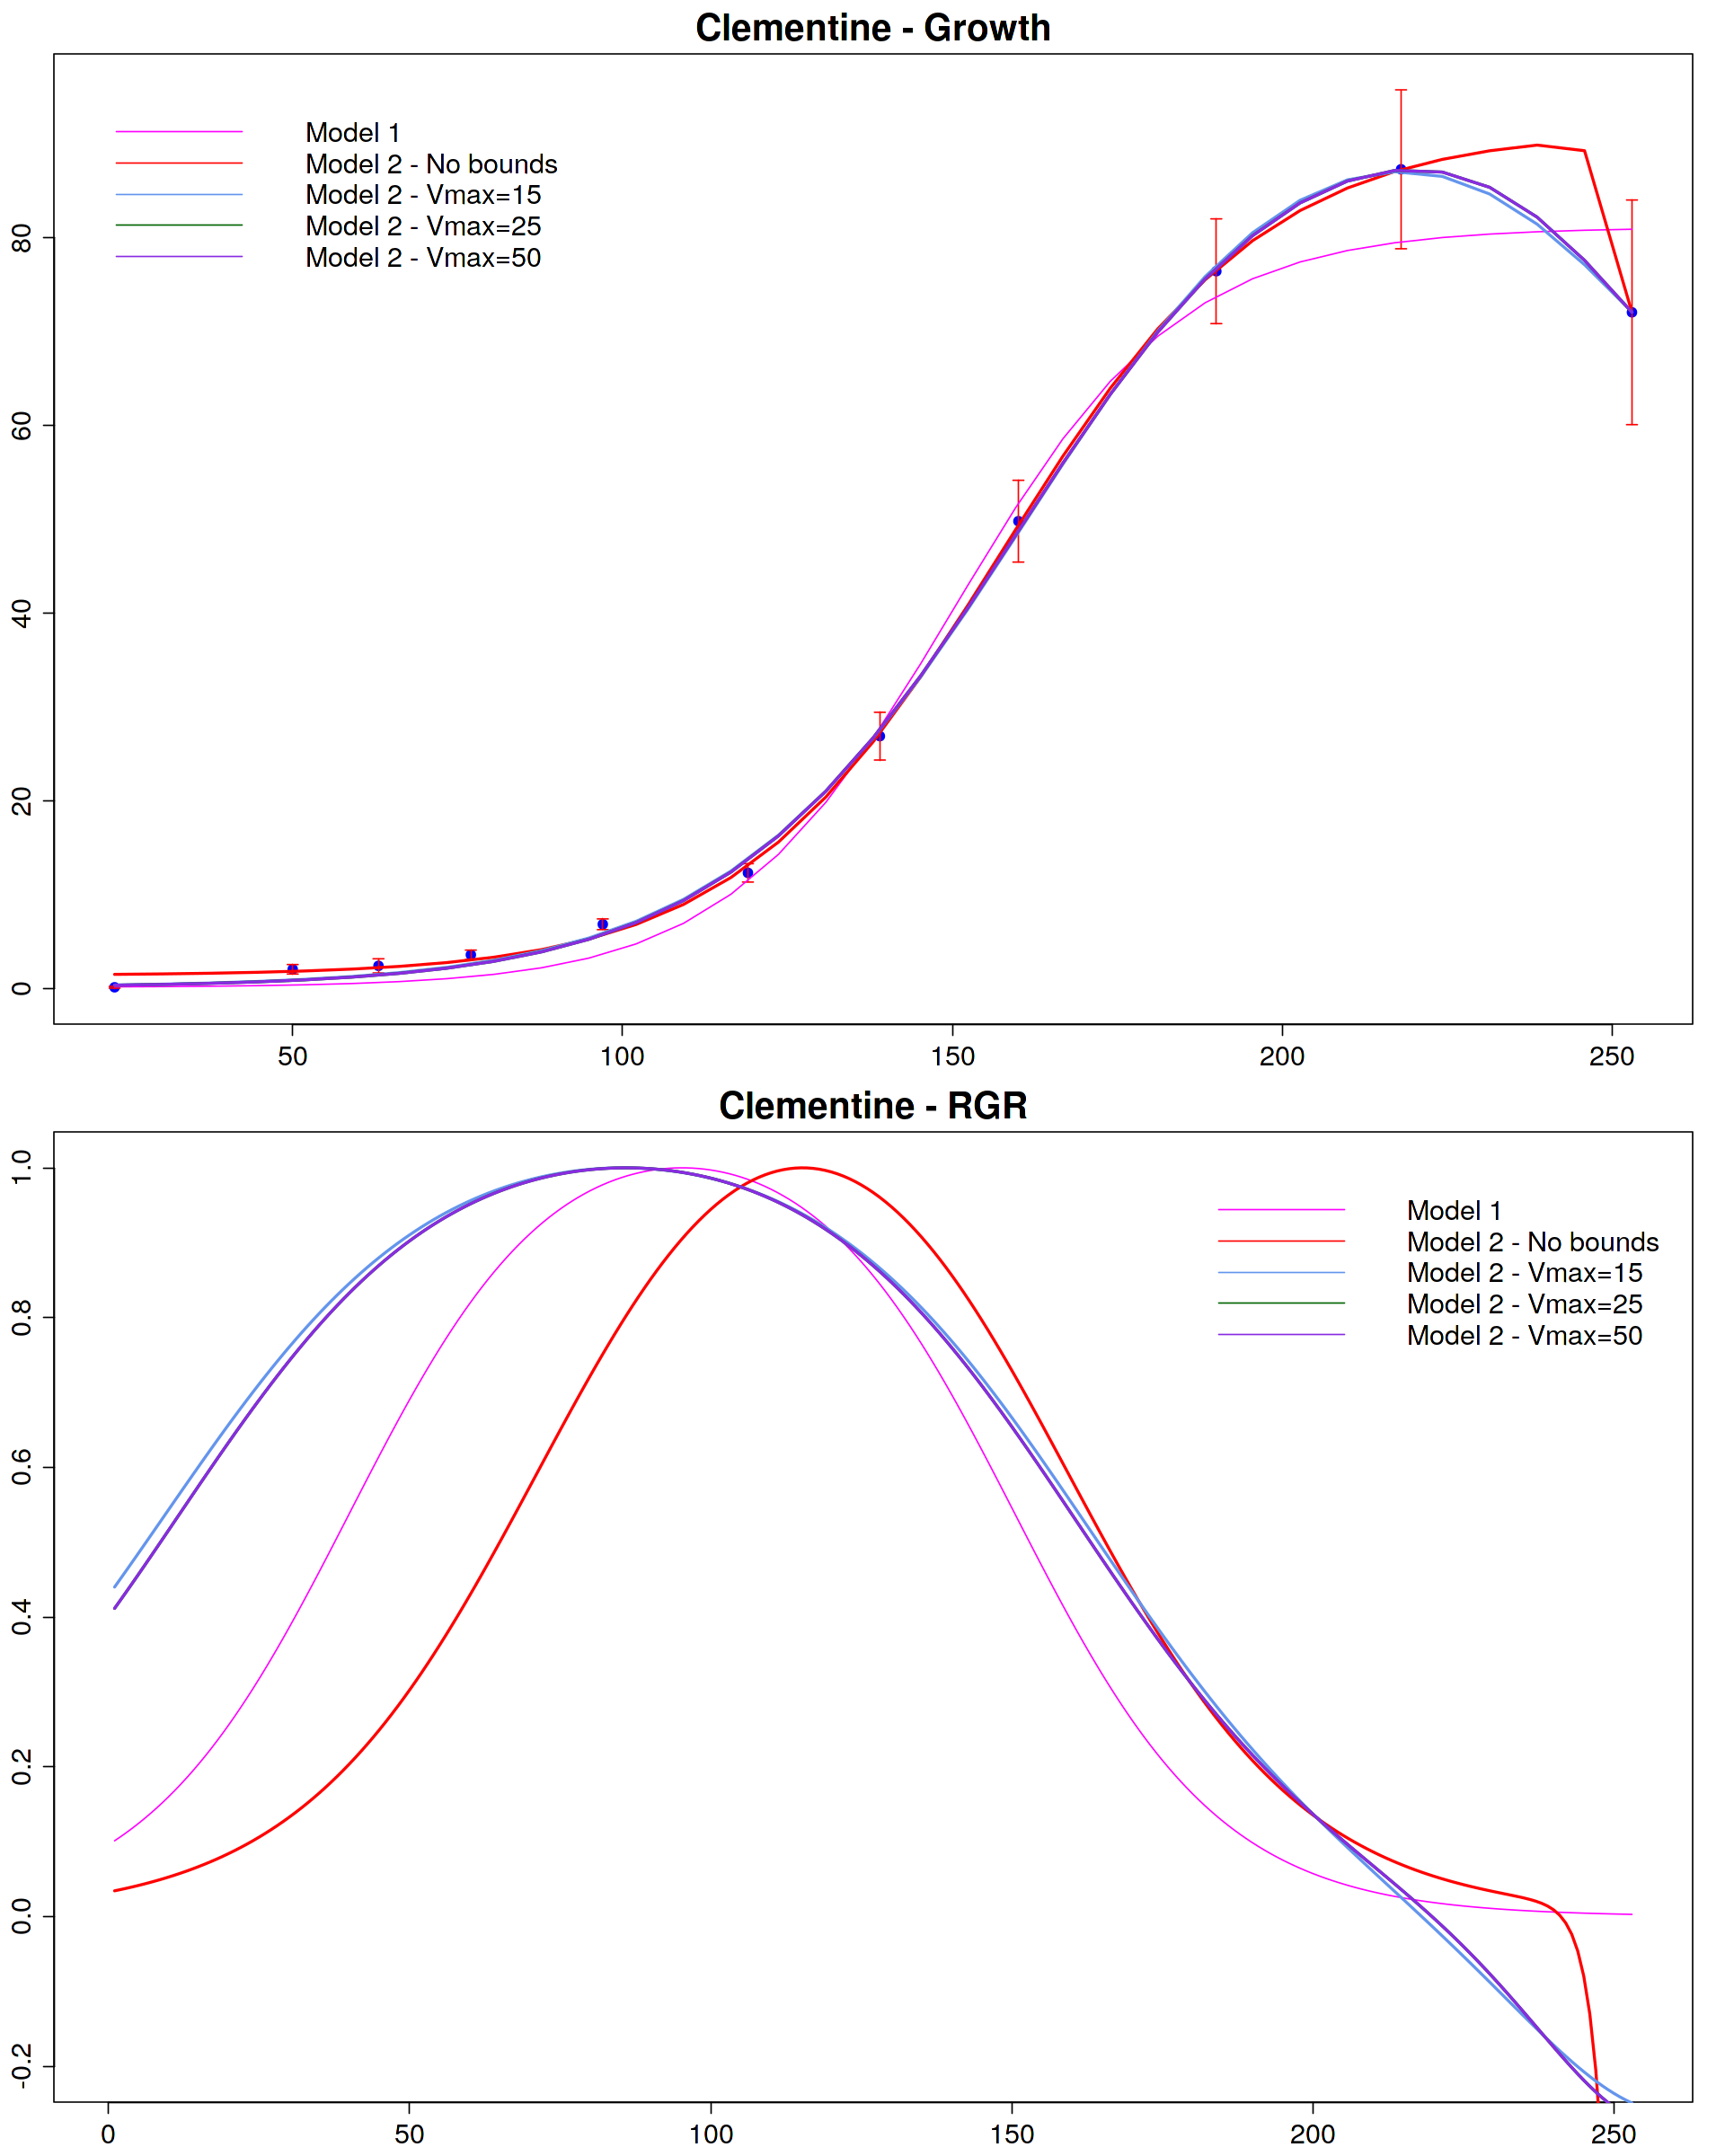

In [3]:
options(repr.plot.width=16, repr.plot.height=20)
plot_growth(m$fitObj1, m$fitObj2, VmaxSet, dataNames[datasetID],overlay=TRUE)

### Display information for the two models 
* (Normalized) parameters of the models 
* according to the different values of _Vmax_ (model 2)
* P(R2)% : percentage of occurrence where the best R2 with 4-digit precision was found
<br/>

| $\Large R^2 $ | $\Large adj.R^2 $ | $\Large P(R2)\% $ | $\Large S1final\% $ | $\Large S2final\% $ | $\Large Avg Res $ |  $\Large SD Res $ |
| :---------: | :---------: | :---------: | :---------: | :---------: | :---------: | :---------: |
| $\Large 1 -\frac{SS_{res}}{SS_{tot}} $ | $\Large 1-(1-R^2)\frac{n-1}{n-p}$ | $ \% \{ R^2>trunc(R^2_{best},4) \} $ | $\Large 100\frac{a}{a+f} $ | $\Large 100\frac{f}{a+f} $ | $\large mean( Y-W_{2}(\theta,t) ) $ |  $\large sd( Y-W_{2}(\theta,t) ) $ |


In [4]:
m$infos1

R2,Adj.R2,P(R2)%,S1final%,S2final%,Avg.Res,SD.Res,a,b,c,d
0.9851,0.9814,100,100,-,-0.010576,0.04668,0.929104,14.694757,0.594215,0


In [5]:
m$infos2

Vmax,R2,Adj.R2,P(R2)%,S1final%,S2final%,Avg.Res,SD.Res,a,b,c,d,f,g,h
0,0.9996,0.9992,9.0,-7136.14,7236.14,-0.001546,0.007717,-1.033755,-12.55711,0.622064,0,1.048242,-106.64719,1.012747
15,0.9993,0.9985,16.0,216.53,-116.53,-0.004085,0.010284,1.158731,11.00106,0.638904,0,-0.623587,15.00000,1.000000
25,0.9993,0.9985,20.5,198.05,-98.05,-0.004479,0.010068,1.120372,11.23296,0.632847,0,-0.554682,18.18452,1.000000
50,0.9993,0.9985,21.0,198.05,-98.05,-0.004479,0.010068,1.120372,11.23296,0.632847,0,-0.554682,18.18454,1.000000


## Plot the distribution of the R-square 
* corresponding to the different values of _Vmax_ 
* based on the _noptim_ models previously computed for each _Vmax_ value

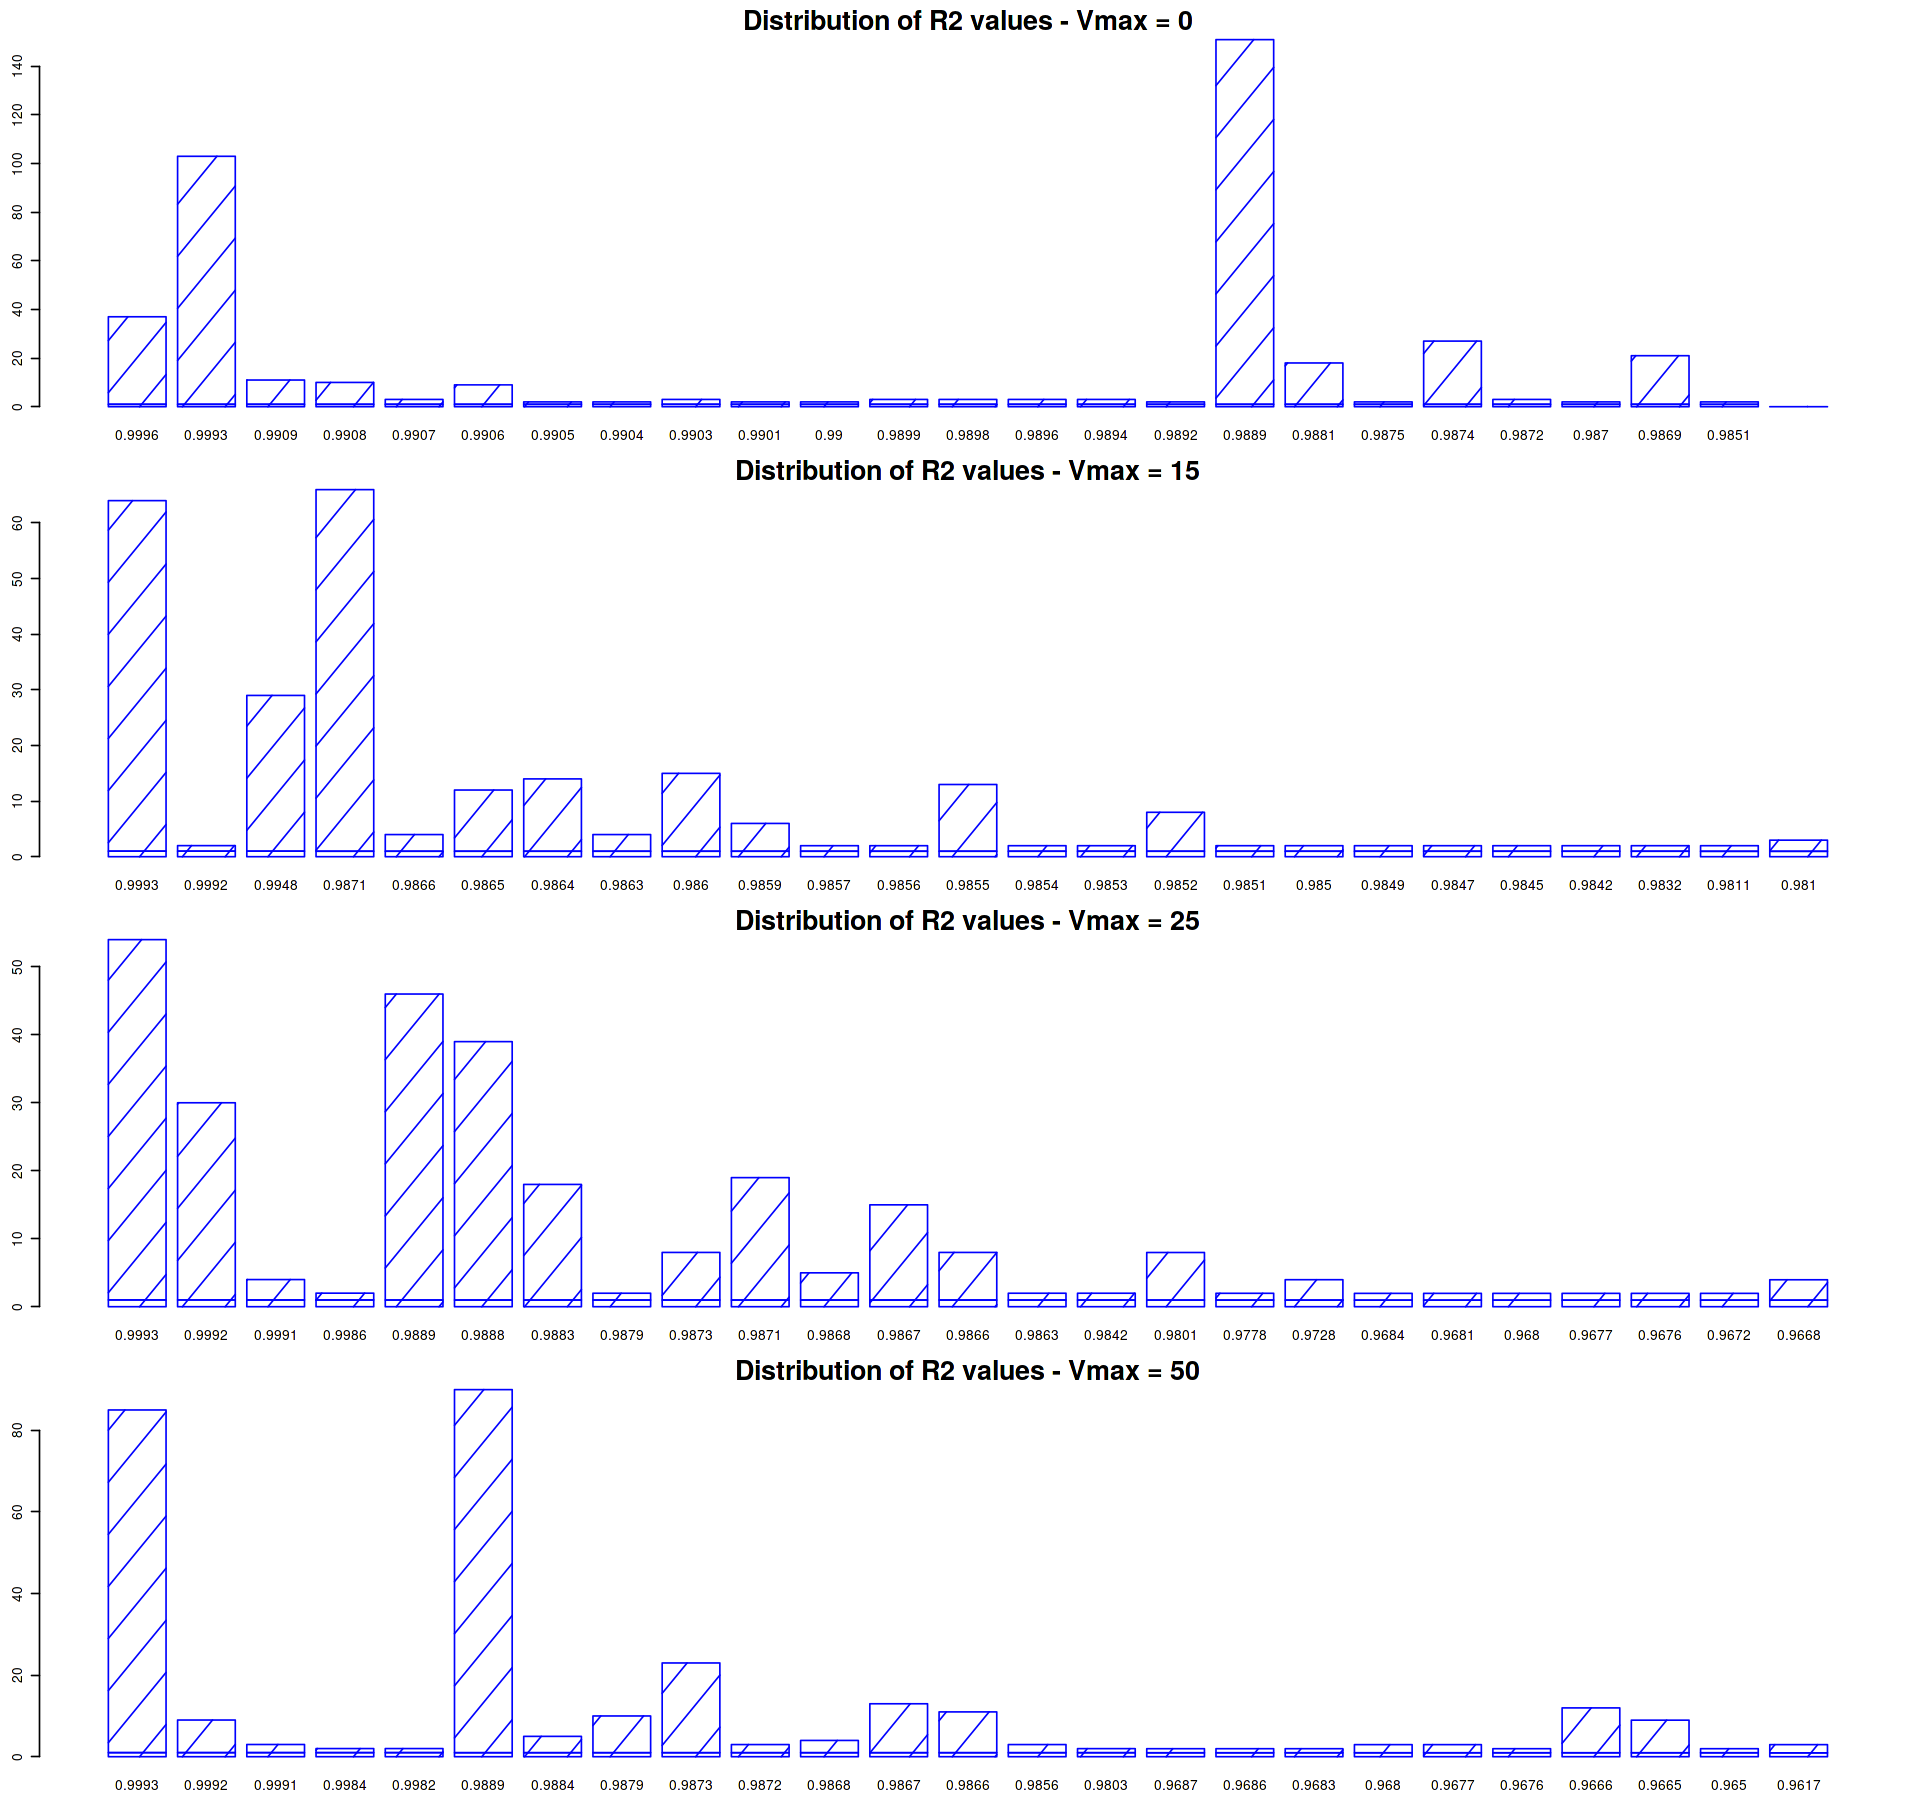

In [6]:
options(repr.plot.width=16, repr.plot.height=15)
plot_R2_hist(m$fitObj2, VmaxSet, 25, dataNames[datasetID])

In [7]:
str(m$fitObj1)

List of 9
 $ data             :'data.frame':	11 obs. of  6 variables:
  ..$ x      : int [1:11] 23 50 63 77 97 119 139 160 190 218 ...
  ..$ y      : num [1:11] 0.135 2.053 2.42 3.595 6.849 ...
  ..$ sdev   : num [1:11] 0.0937 0.5054 0.7543 0.5004 0.5721 ...
  ..$ ymodel : num [1:11] 0.184 0.373 0.639 1.263 3.633 ...
  ..$ dymodel: num [1:11] 0.00288 0.01377 0.02911 0.06462 0.1944 ...
  ..$ RGR    : num [1:11] 0.0156 0.037 0.0455 0.0512 0.0535 ...
 $ normalized_params: num [1:4] 0.929 14.695 0.594 0
 $ params           : num [1:4] 80.9845 0.0581 150.3365 0.1348
 $ model            : num 1
 $ R2               : num 0.985
 $ adjR2            : num 0.981
 $ R2vec            : num [1:400] 0.985 0.985 0.985 0.985 0.985 ...
 $ fsig             :function (x, par)  
 $ dfsig            :function (x, par)  


In [8]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Rodam_0.1.9      httr_1.4.4       minpack.lm_1.2-2

loaded via a namespace (and not attached):
 [1] fansi_1.0.3     crayon_1.4.1    digest_0.6.31   utf8_1.2.2     
 [5] IRdisplay_1.0   R6_2.5.1        repr_1.1.3      lifecycle_1.0.3
 [9] jsonlite_1.8.4  evaluate_0.19   pillar_1.8.1    rlang_1.0.6    
[13] cli_3.5.0       curl_4.3.3      uuid_0.1-4      vct